In [1]:
import pandas as pd 
df=pd.read_csv("B:\\Feb_28 Data\\EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [2]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

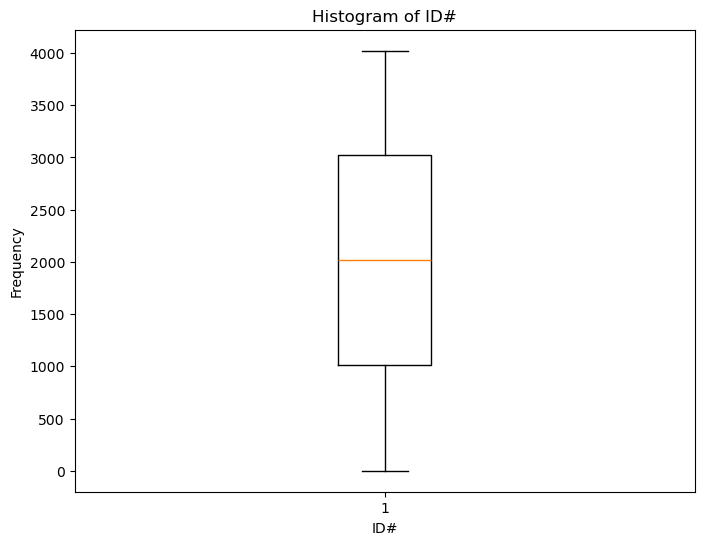

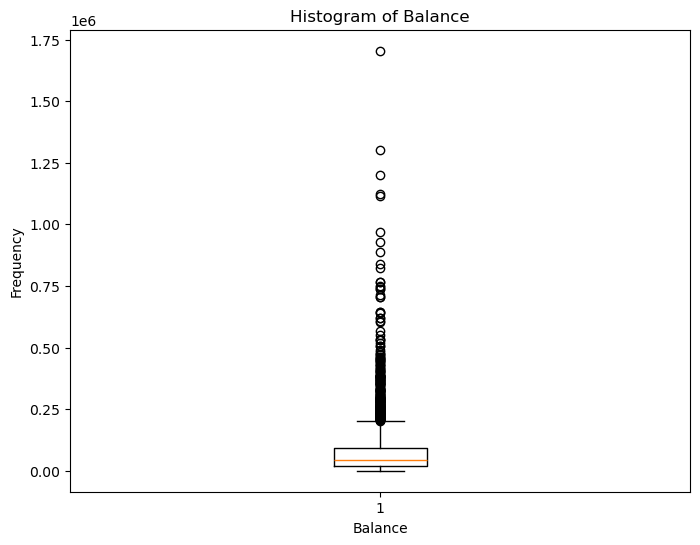

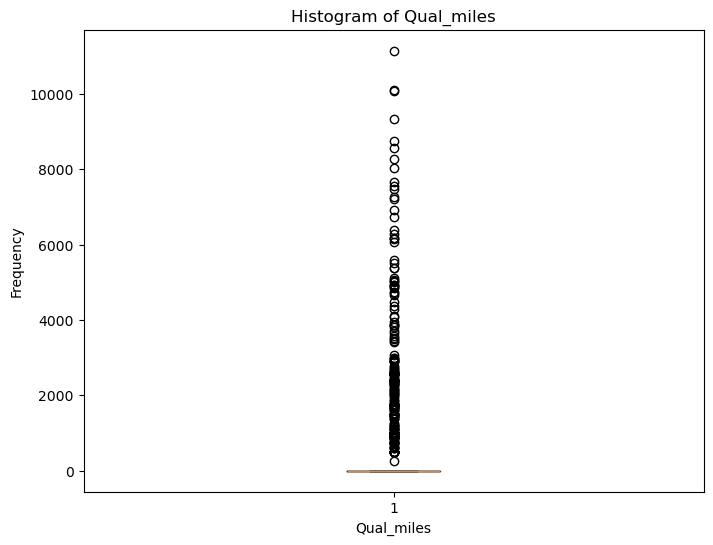

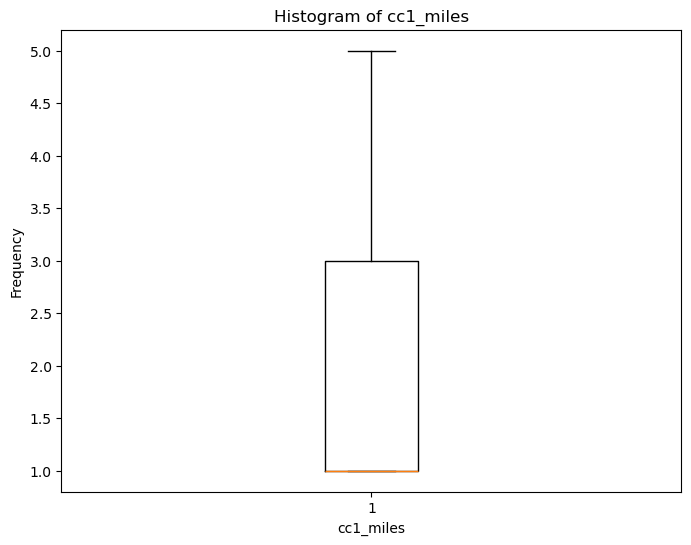

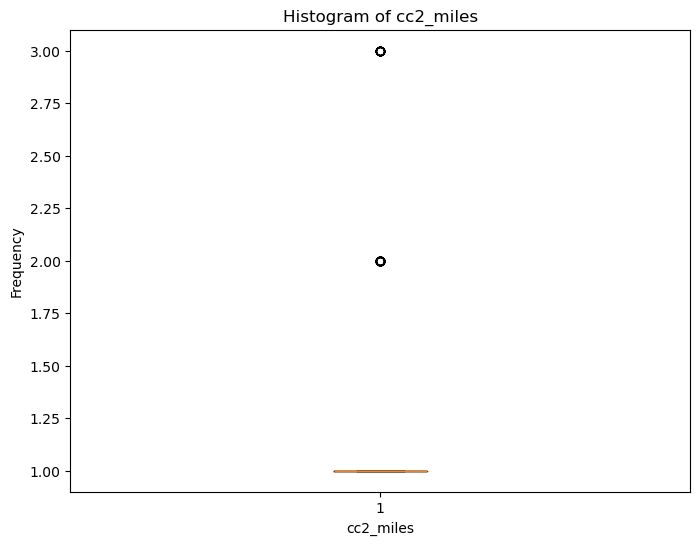

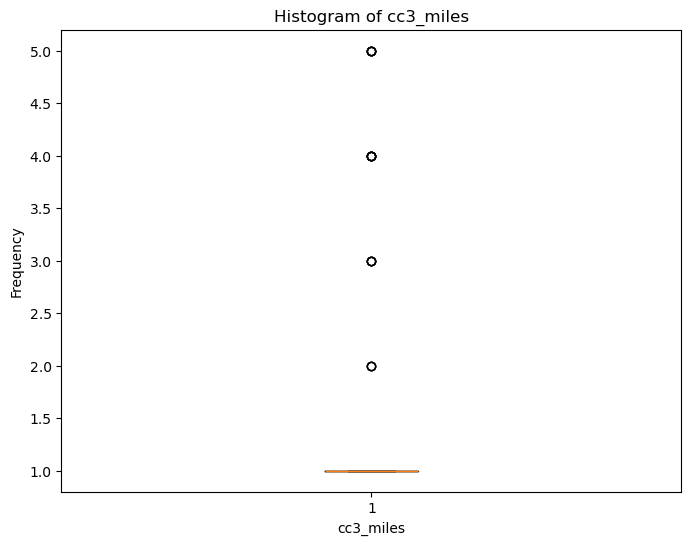

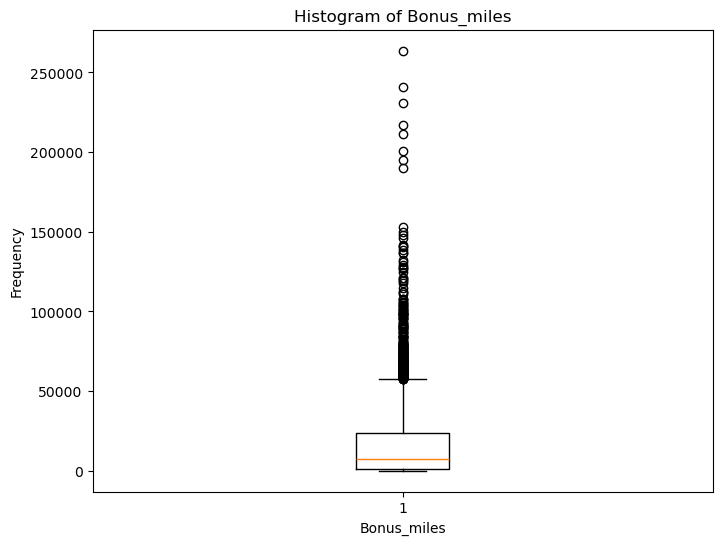

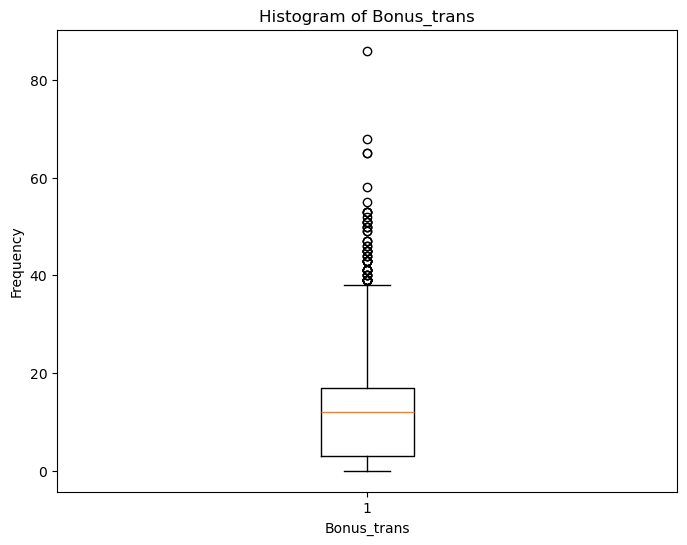

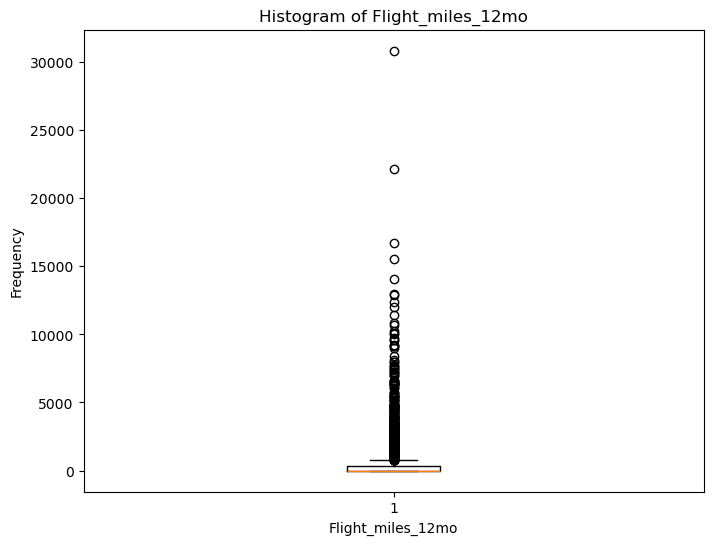

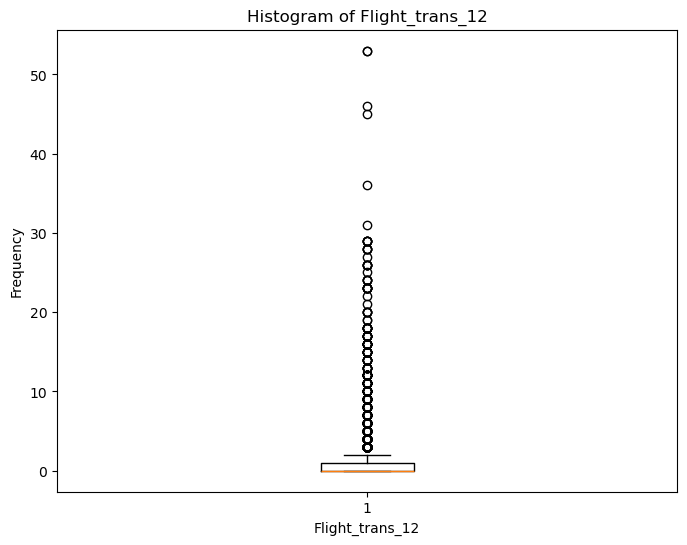

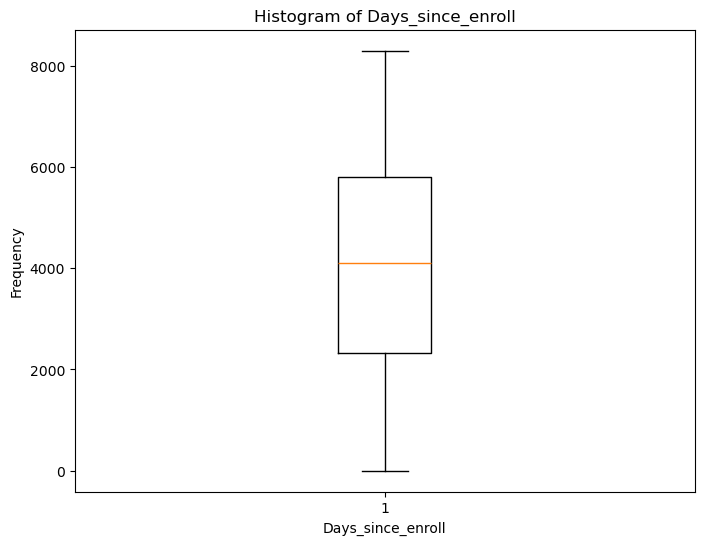

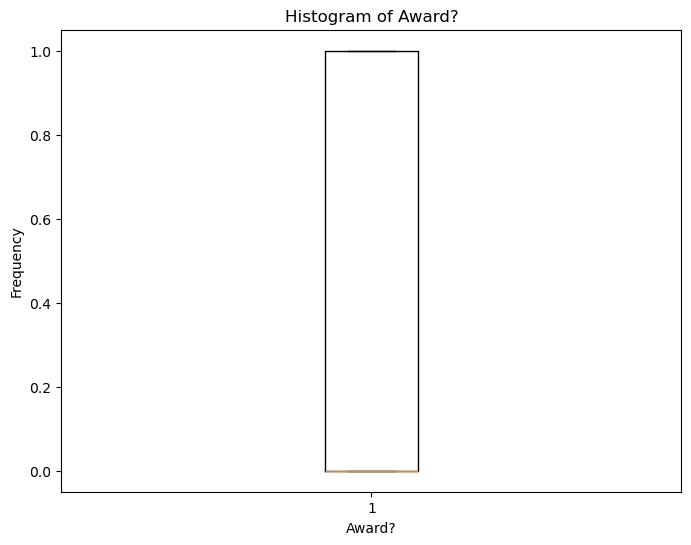

In [3]:
import matplotlib.pyplot as plt 
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

column_sums = df.sum()

In [15]:
# prompt: can you code me to remove the outliers of the data

def remove_outliers(df, column, threshold=3):
  mean = df[column].mean()
  std_dev = df[column].std()
  z_scores = (df[column] - mean) / std_dev
  df_cleaned = df[(z_scores.abs() < threshold)].copy()
  return df_cleaned

# Example usage:
# Assuming you want to remove outliers from a column named 'Balance'
df_cleaned = remove_outliers(df.copy(), 'Balance')

# You can apply this to multiple columns
# for col in ['Balance', 'Qual_miles', 'Bonus_miles']:
#     df = remove_outliers(df, col)

# Now df_cleaned contains the DataFrame with outliers removed from 'Balance'


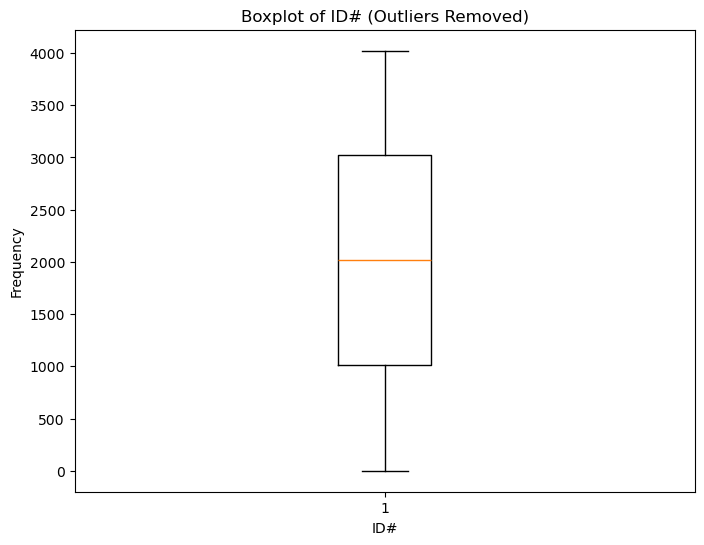

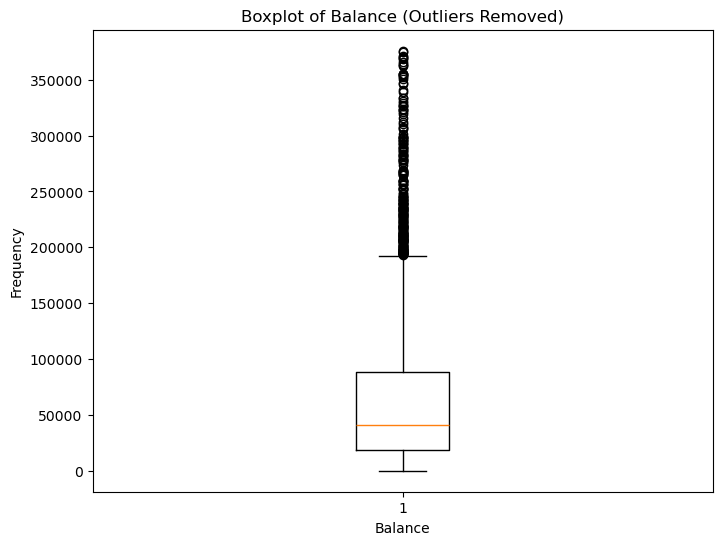

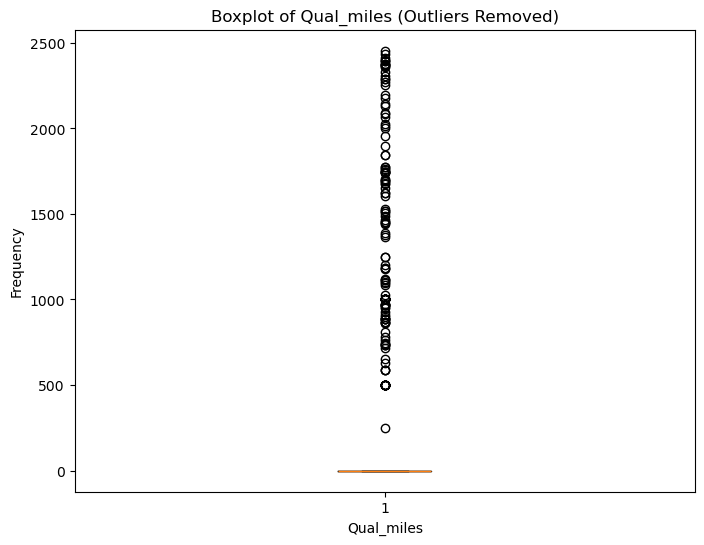

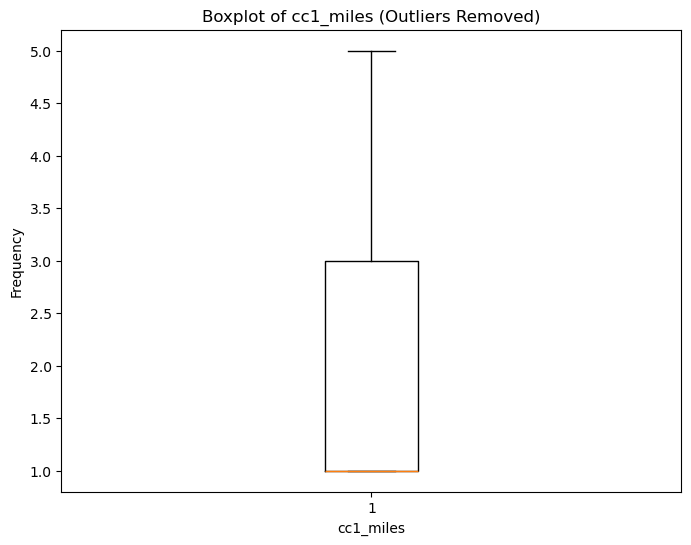

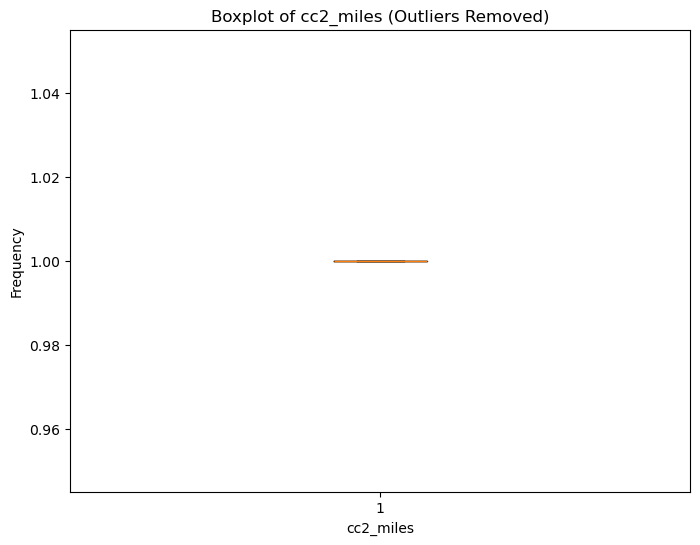

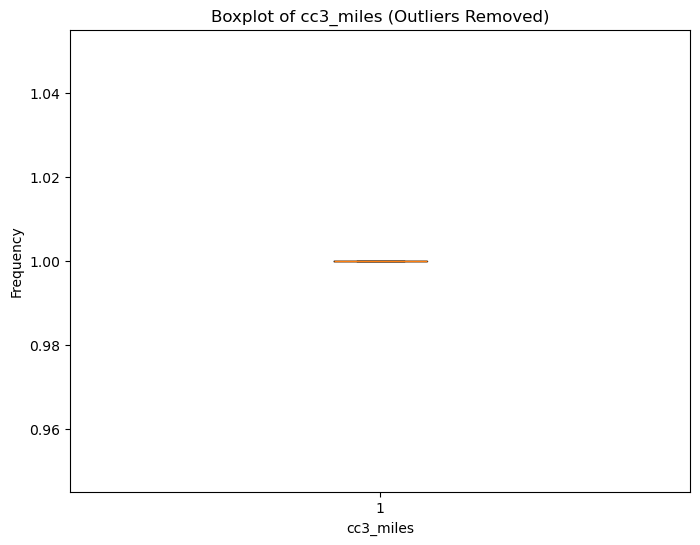

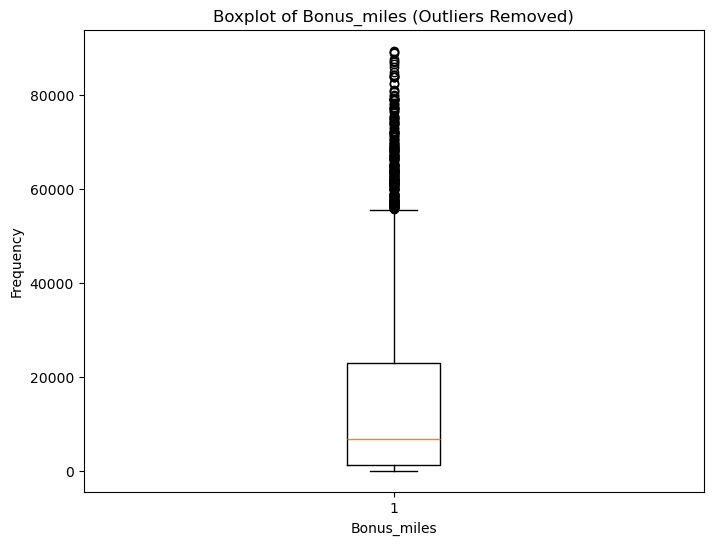

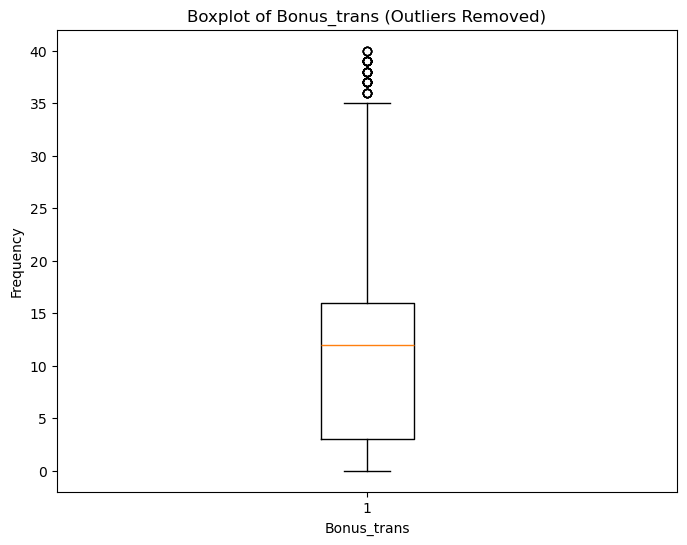

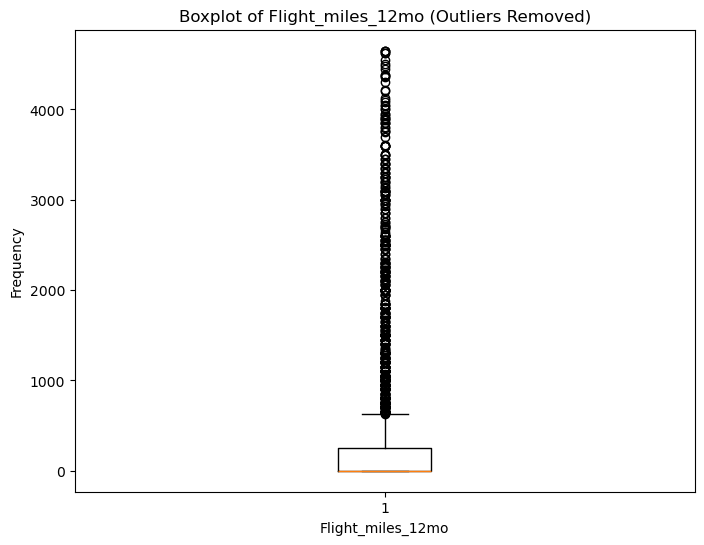

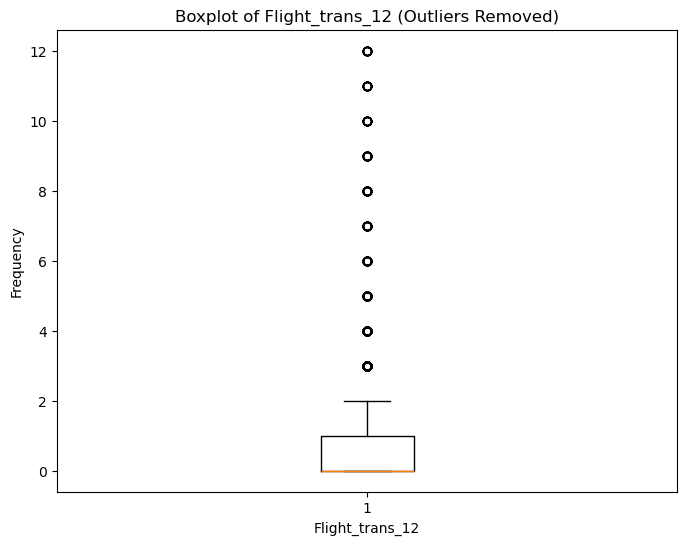

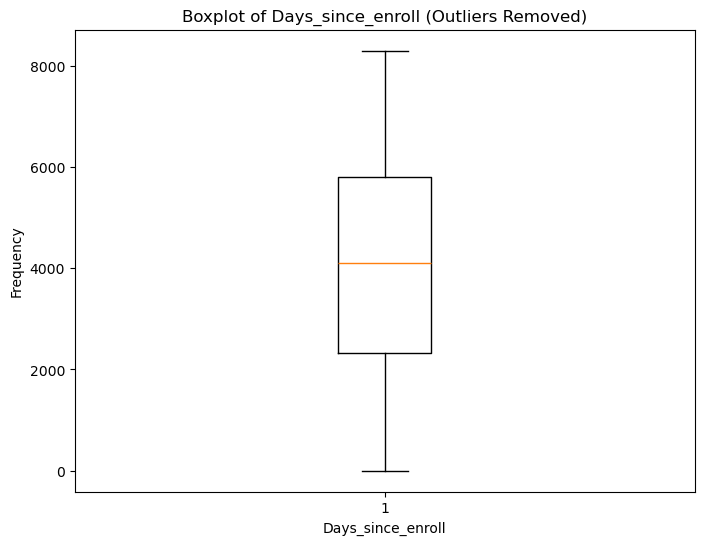

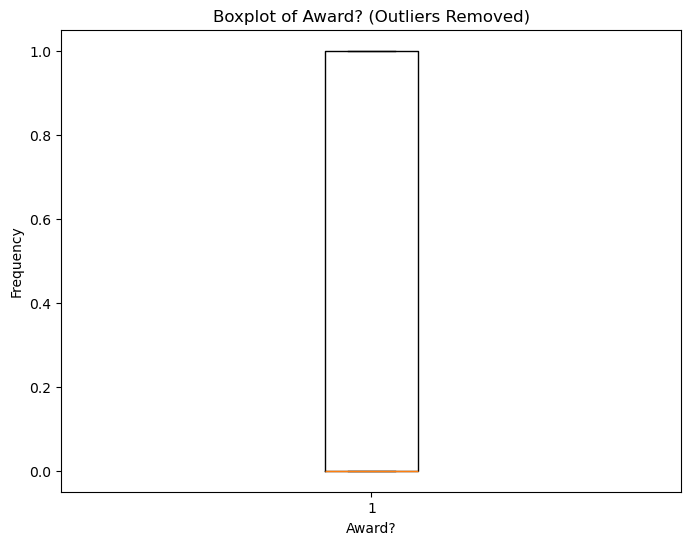

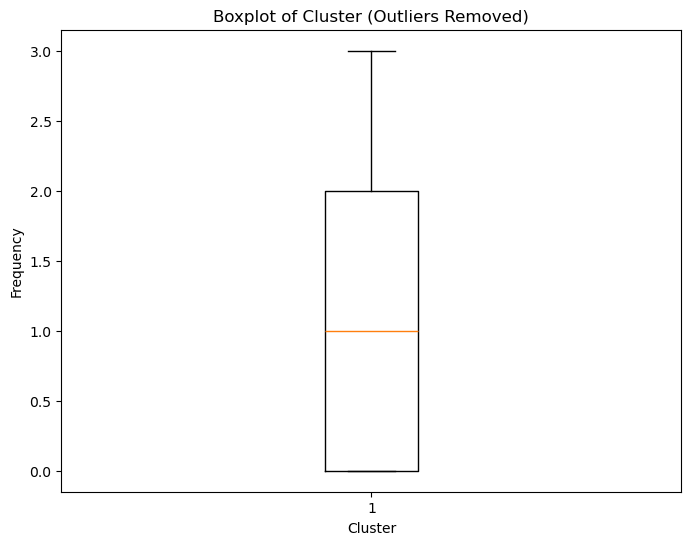

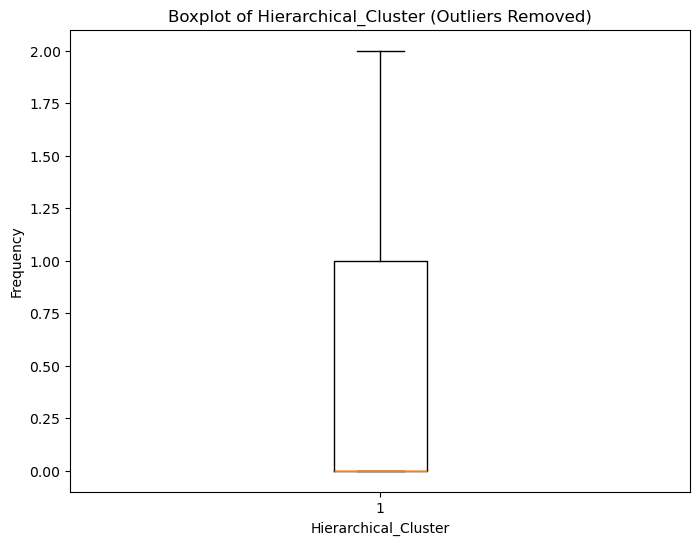

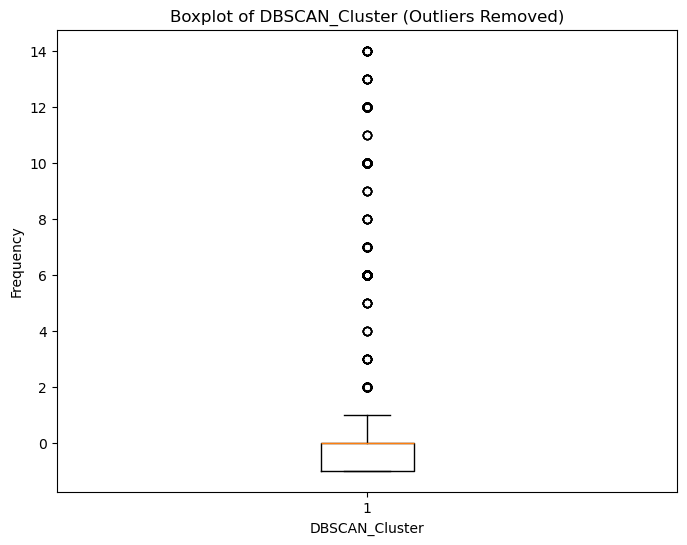

In [16]:
# prompt: In the above boxplot it's showing that outliers are not removed

import matplotlib.pyplot as plt
for column in df.columns:
    # Apply outlier removal to the column
    df_cleaned = remove_outliers(df.copy(), column)

    plt.figure(figsize=(8, 6))
    plt.boxplot(df_cleaned[column])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Boxplot of {column} (Outliers Removed)')
    plt.show()



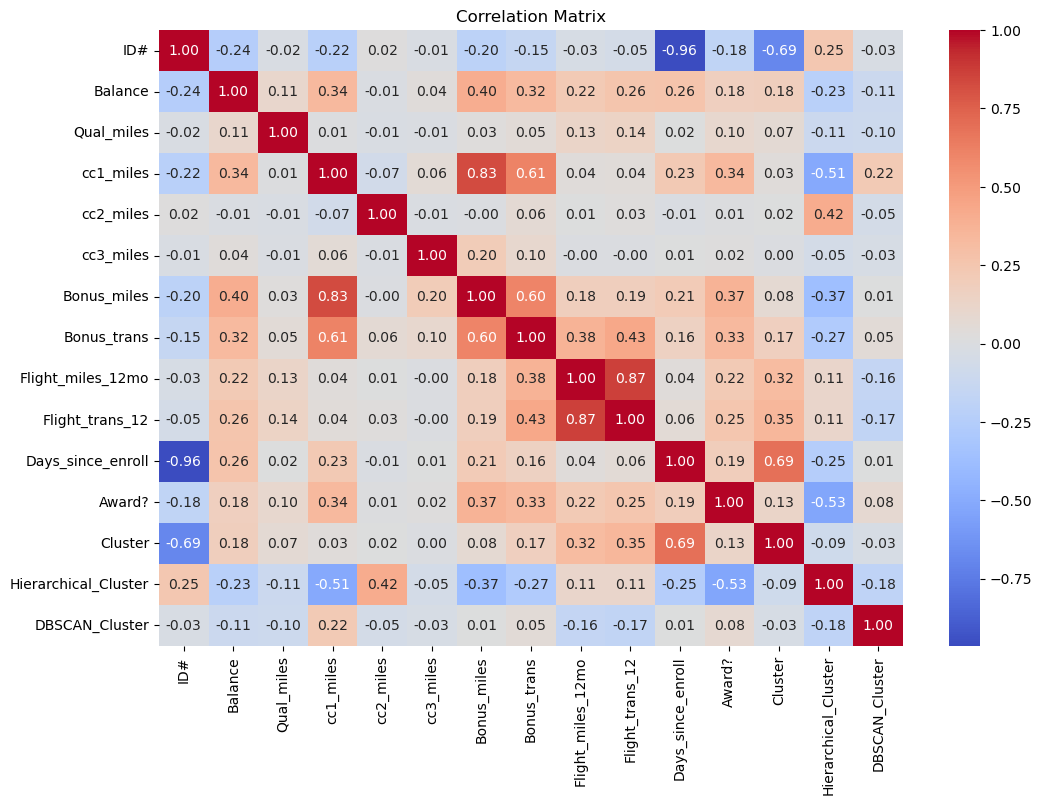

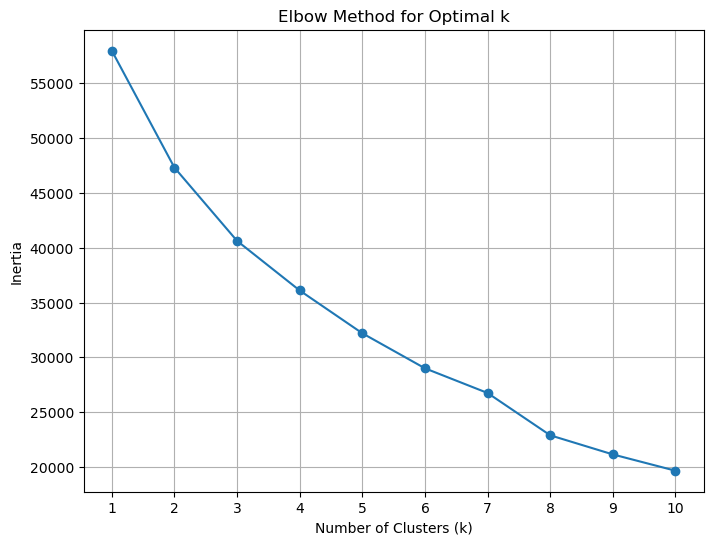


Cluster Analysis:
                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
0        1687.552000  214590.696000  951.376000   2.160000   1.048000   
1        1513.461856  130784.286598  183.755670   3.878351   1.000000   
2        1094.831240   56848.952119   97.350863   1.353218   1.019623   
3        3143.020722   39652.514706  103.692513   1.346925   1.018048   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
0         1.000000  33843.536000    29.008000        6013.472000   
1         1.049485  45294.873196    19.976289         464.280412   
2         1.000785   5771.510989     7.905024         227.115385   
3         1.000000   5980.989305     7.608957         225.320187   

         Flight_trans_12  Days_since_enroll    Award?  Hierarchical_Cluster  \
Cluster                                               

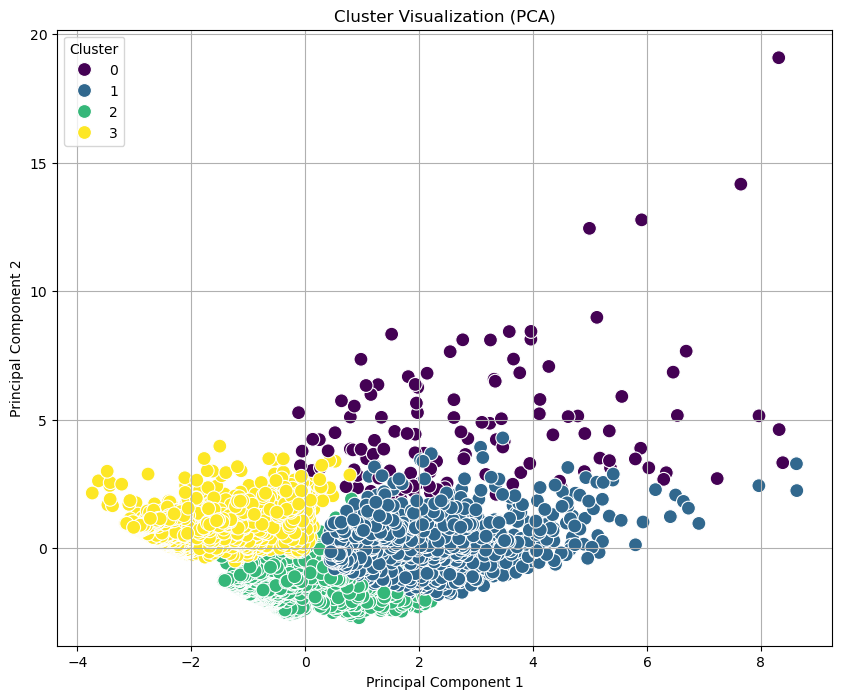

In [19]:
#Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters?
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scale the data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned) # Use df_cleaned after outlier removal

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Added n_init explicitly
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the Elbow Method, choose a suitable number of clusters (e.g., 4)
optimal_k = 4  # Adjust based on the elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init explicitly
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze the characteristics of each cluster
print("\nCluster Analysis:")
cluster_summary = df_cleaned.groupby('Cluster').mean()
print(cluster_summary)


# If you have many dimensions, consider using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_cleaned['Cluster'].reset_index(drop=True) # Ensure indices align

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

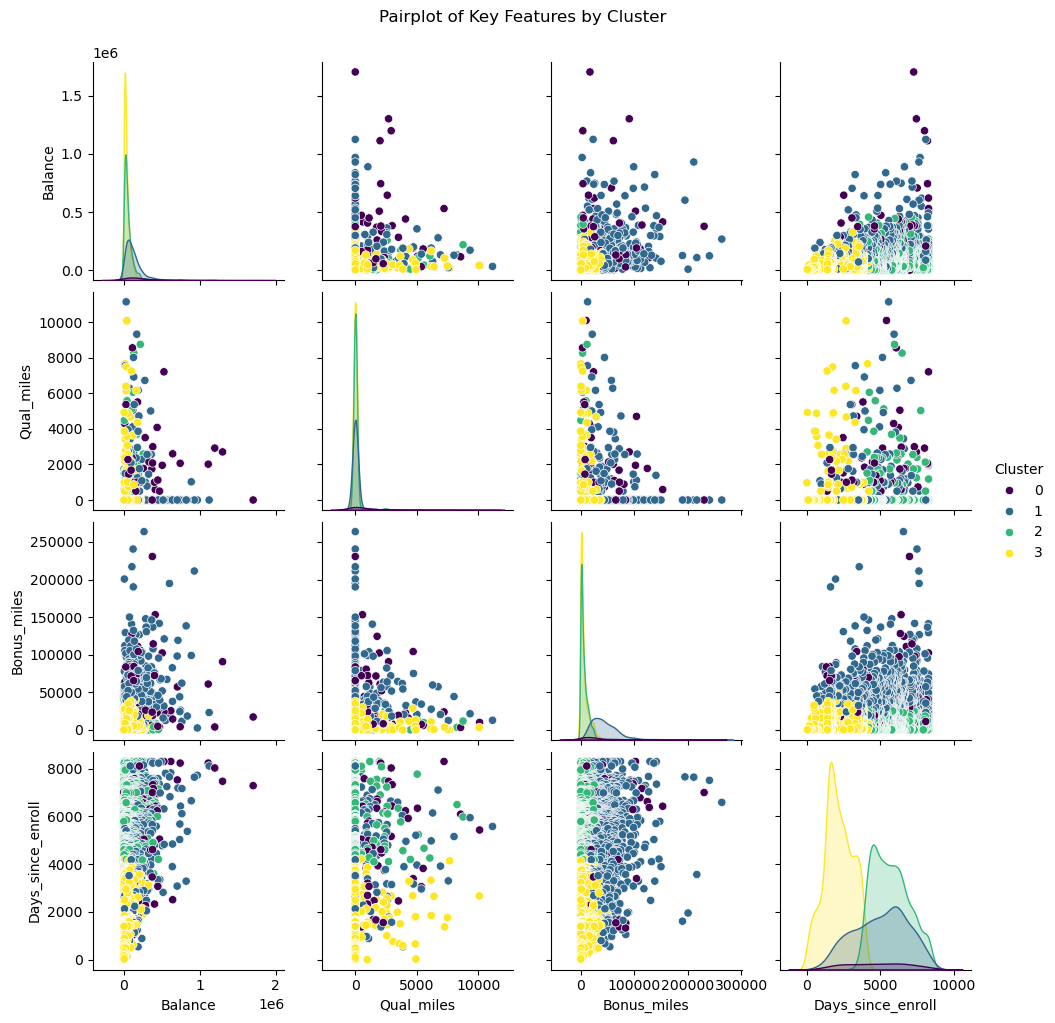

C:\Users\balav\AppData\Local\Temp\ipykernel_9348\1321144864.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_cleaned, palette='viridis')


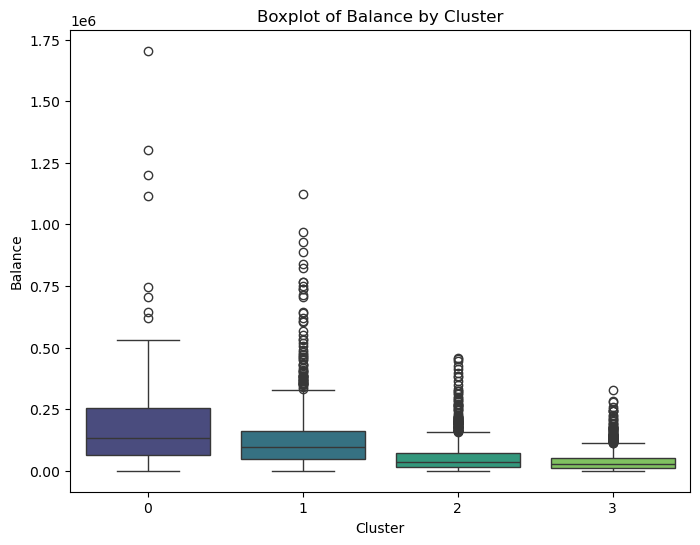

C:\Users\balav\AppData\Local\Temp\ipykernel_9348\1321144864.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_cleaned, palette='viridis')


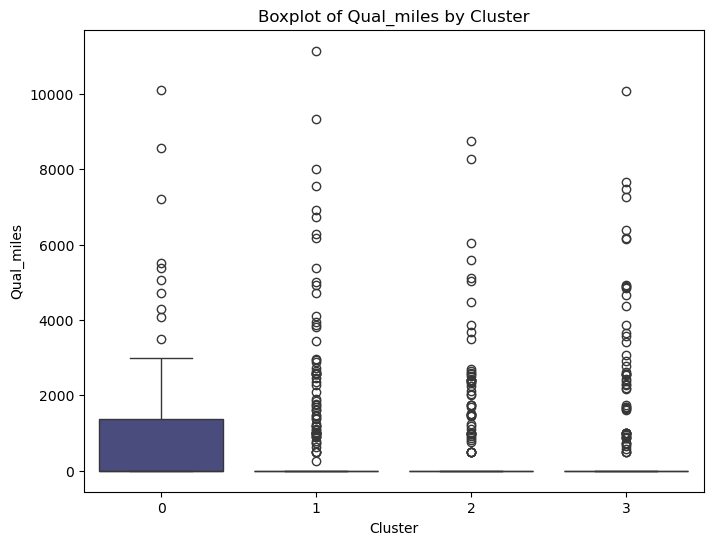

C:\Users\balav\AppData\Local\Temp\ipykernel_9348\1321144864.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_cleaned, palette='viridis')


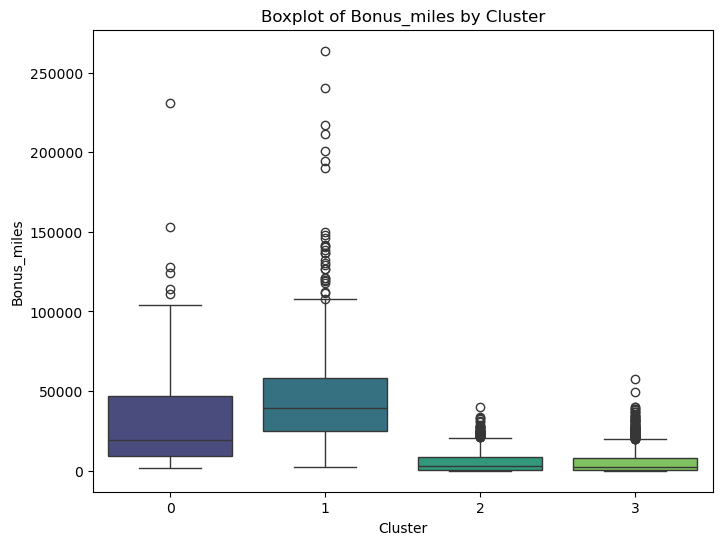

C:\Users\balav\AppData\Local\Temp\ipykernel_9348\1321144864.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_cleaned, palette='viridis')


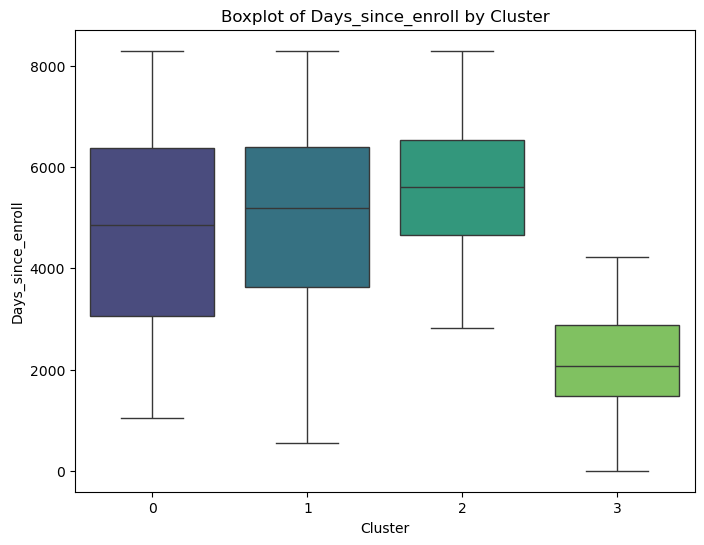

C:\Users\balav\AppData\Local\Temp\ipykernel_9348\1321144864.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_cleaned, palette='viridis')


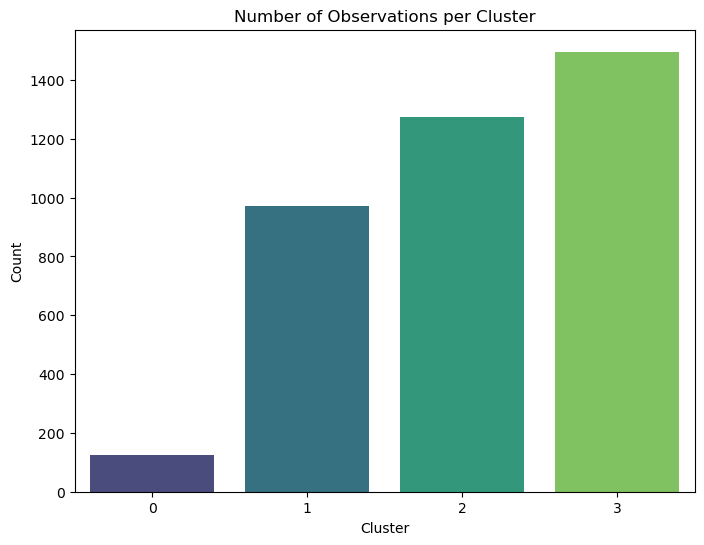

C:\Users\balav\AppData\Local\Temp\ipykernel_9348\1321144864.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Balance', data=df_cleaned, palette='viridis')


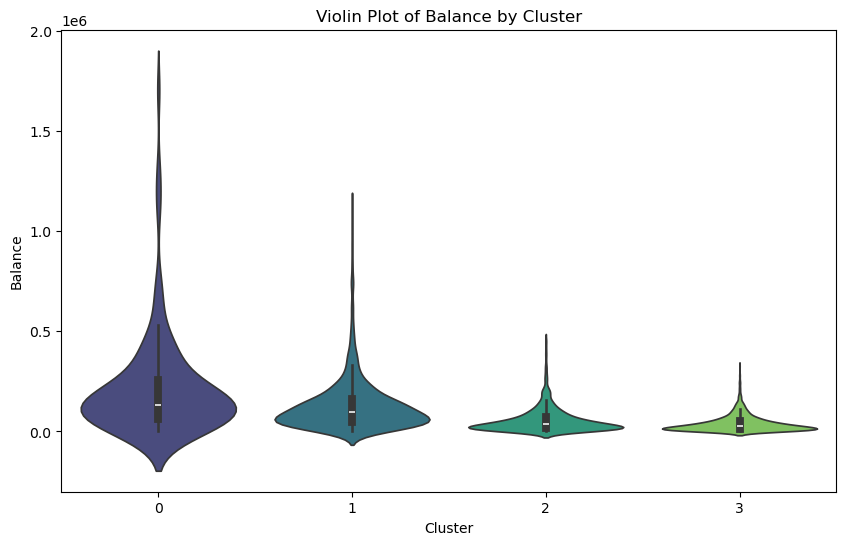

In [20]:
# Multiple visualizations to understand the hidden patterns in the dataset?
# Let's add some more visualizations to understand the data and clusters better

key_columns = ['Balance', 'Qual_miles', 'Bonus_miles', 'Awards', 'Days_since_enroll', 'Cluster'] # Example columns
# Ensure these columns exist in df_cleaned
key_columns_exist = [col for col in key_columns if col in df_cleaned.columns]

if len(key_columns_exist) > 1: # Need at least two columns for pairplot
    plt.figure(figsize=(15, 10))
    sns.pairplot(df_cleaned[key_columns_exist], hue='Cluster', palette='viridis')
    plt.suptitle('Pairplot of Key Features by Cluster', y=1.02)
    plt.show()
else:
    print("Could not create pairplot. Ensure key_columns contains valid column names from the DataFrame.")

# Boxplots of key features by cluster to see how feature distributions differ across clusters
if len(key_columns_exist) > 1:
    for col in key_columns_exist[:-1]: # Exclude the 'Cluster' column itself
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Cluster', y=col, data=df_cleaned, palette='viridis')
        plt.title(f'Boxplot of {col} by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(col)
        plt.show()
else:
     print("Could not create boxplots by cluster. Ensure key_columns contains valid column names from the DataFrame.")

# Count plot of observations per cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df_cleaned, palette='viridis')
plt.title('Number of Observations per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Consider plotting distributions of individual features for each cluster using violin plots or histograms
# Example for one column:
# Replace 'Balance' with a column you want to visualize
if 'Balance' in df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Cluster', y='Balance', data=df_cleaned, palette='viridis')
    plt.title('Violin Plot of Balance by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Balance')
    plt.show()

# You can repeat the above violin plot for other relevant columns.

# Scatter plot of two features, potentially using size or color to represent other attributes or clusters
# Example: Balance vs. Awards colored by Cluster
if 'Balance' in df_cleaned.columns and 'Awards' in df_cleaned.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Balance', y='Awards', hue='Cluster', data=df_cleaned, palette='viridis', s=100, alpha=0.6)
    plt.title('Balance vs. Awards colored by Cluster')
    plt.xlabel('Balance')
    plt.ylabel('Awards')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

# Remember to adjust the column names in these visualizations based on your specific dataset and findings from the cluster analysis.
# The goal is to find plots that effectively highlight the differences between the identified clusters.

In [ ]:
# prompt: can you implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB?

import matplotlib.pyplot as plt
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Hierarchical Clustering (example with 4 clusters based on K-Means result)
# Changed 'affinity' to 'metric' as 'affinity' is deprecated in newer scikit-learn versions
hierarchical_model = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
df_cleaned['Hierarchical_Cluster'] = hierarchical_model.fit_predict(df_scaled)

print("\nHierarchical Cluster Analysis:")
hierarchical_cluster_summary = df_cleaned.groupby('Hierarchical_Cluster').mean()
print(hierarchical_cluster_summary)

# Visualize Hierarchical Clusters using PCA
df_pca_hierarchical = df_pca.copy()
df_pca_hierarchical['Hierarchical_Cluster'] = df_cleaned['Hierarchical_Cluster'].reset_index(drop=True)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=df_pca_hierarchical, palette='viridis', s=100)
plt.title('Hierarchical Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# You can also plot a dendrogram to visualize the hierarchical clustering process
# Note: Dendrogram can be computationally intensive for large datasets
# Linking the data points
linked_data = linkage(df_scaled, method='ward')


# DBSCAN Clustering
from sklearn.cluster import DBSCAN

# Apply DBSCAN (you may need to tune eps and min_samples)
# Let's try some initial values. Tuning is crucial for DBSCAN.
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
dbscan_model = DBSCAN(eps=0.5, min_samples=5) # These are example values, tune them based on your data
df_cleaned['DBSCAN_Cluster'] = dbscan_model.fit_predict(df_scaled)

# DBSCAN assigns -1 to noise points. These are considered a cluster of outliers.
print("\nDBSCAN Cluster Analysis:")
# We can analyze the clusters including the noise points (-1)
dbscan_cluster_summary = df_cleaned.groupby('DBSCAN_Cluster').mean()
print(dbscan_cluster_summary)

# Count the number of points in each DBSCAN cluster
print("\nNumber of points per DBSCAN cluster:")
print(df_cleaned['DBSCAN_Cluster'].value_counts())


# Visualize DBSCAN Clusters using PCA
df_pca_dbscan = df_pca.copy()
df_pca_dbscan['DBSCAN_Cluster'] = df_cleaned['DBSCAN_Cluster'].reset_index(drop=True)

plt.figure(figsize=(10, 8))
# Use 'hsv' colormap or another suitable one that handles negative values (noise)
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df_pca_dbscan, palette='viridis', s=100, alpha=0.6)
plt.title('DBSCAN Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Further analysis of DBSCAN clusters:
# You can examine the characteristics of the noise cluster (-1) compared to other clusters.
noise_points = df_cleaned[df_cleaned['DBSCAN_Cluster'] == -1]
print("\nCharacteristics of Noise Points (DBSCAN Cluster -1):")
print(noise_points.describe())

# To tune DBSCAN, you can use techniques like k-distance graph to estimate eps.
# You would typically calculate the distance to the k-th nearest neighbor for each point
# and plot these distances in ascending order to find a suitable eps value at the "elbow"
# in the plot.

# Example for calculating k-distance (requires neighbors library)
# !pip install scikit-learn
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Let's calculate the distance to the (min_samples - 1)th nearest neighbor for DBSCAN
# Using min_samples = 5 as an example, we need distance to the 4th neighbor
k = 4 # min_samples - 1
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

# Sort the distances
distances = np.sort(distances[:,k-1], axis=0)

# Plot the k-distance graph to find potential eps
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance to ({})th nearest neighbor'.format(k))
plt.ylabel('Distance')
plt.title('k-Distance Graph')
plt.grid(True)
plt.show()

# Look for an "elbow" in this graph to choose a suitable eps value for DBSCAN.
# After observing the graph, you would re-run the DBSCAN model with the chosen eps.

print("\nImplementation of K-Means, Hierarchical, and DBSCAN is complete.")
print("Note: DBSCAN requires careful tuning of eps and min_samples.")
print("The k-distance graph is provided as a tool to help determine a suitable eps.")

In [10]:
#Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results?

# Experiment with different linkage criteria for Hierarchical Clustering
linkage_criteria = ['ward', 'complete', 'average', 'single']

print("\nExperimenting with different linkage criteria for Hierarchical Clustering:")
for linkage_method in linkage_criteria:
    print(f"\nApplying Hierarchical Clustering with linkage: {linkage_method}")
    try:
        hierarchical_model_exp = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage=linkage_method)
        # Fit to the scaled data (df_scaled)
        hierarchical_clusters_exp = hierarchical_model_exp.fit_predict(df_scaled)

        # Add the cluster labels to a temporary DataFrame for analysis
        df_temp = df.copy() # Use df_cleaned which has original features and K-Means cluster
        df_temp[f'Hierarchical_Cluster_{linkage_method}'] = hierarchical_clusters_exp

        # Analyze the characteristics of each cluster
        print(f"Cluster Analysis for Linkage Method: {linkage_method}")
        cluster_summary_exp = df_temp.groupby(f'Hierarchical_Cluster_{linkage_method}').mean()
        print(cluster_summary_exp)


    except Exception as e:
        print(f"Could not apply Hierarchical Clustering with linkage '{linkage_method}': {e}")


# Example parameter grid for DBSCAN (replace with values relevant to your data)
dbscan_params = [
    {'eps': 0.5, 'min_samples': 5},  # Original values
    {'eps': 1.0, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 10},
    {'eps': 1.0, 'min_samples': 10},
    {'eps': 1.5, 'min_samples': 5},
    {'eps': 1.5, 'min_samples': 10},
]

print("\nExperimenting with different parameter settings for DBSCAN:")
for params in dbscan_params:
    eps = params['eps']
    min_samples = params['min_samples']
    print(f"\nApplying DBSCAN with eps={eps}, min_samples={min_samples}")

    try:
        dbscan_model_exp = DBSCAN(eps=eps, min_samples=min_samples)
        # Fit to the scaled data (df_scaled)
        dbscan_clusters_exp = dbscan_model_exp.fit_predict(df_scaled)

        # Add the cluster labels to a temporary DataFrame for analysis
        df_temp = df_cleaned.copy() # Use df_cleaned
        df_temp[f'DBSCAN_Cluster_eps{eps}_minPts{min_samples}'] = dbscan_clusters_exp

        # Analyze the characteristics of each cluster
        print(f"Cluster Analysis for DBSCAN (eps={eps}, min_samples={min_samples})")
        cluster_summary_exp = df_temp.groupby(f'DBSCAN_Cluster_eps{eps}_minPts{min_samples}').mean()
        print(cluster_summary_exp)

        # Count the number of points in each cluster (including noise -1)
        print(f"Number of points per DBSCAN cluster (eps={eps}, min_samples={min_samples}):")
        print(df_temp[f'DBSCAN_Cluster_eps{eps}_minPts{min_samples}'].value_counts())

        # You could also visualize these different DBSCAN results using PCA as done previously,
        # creating separate plots for each parameter combination.

    except Exception as e:
        print(f"Could not apply DBSCAN with eps={eps}, min_samples={min_samples}: {e}")

print("\nExperimentation with different parameters is complete.")
print("Evaluate the clustering results by examining the cluster summaries,")
print("number of clusters/noise points, and potentially visualizations for key experiments.")


Experimenting with different linkage criteria for Hierarchical Clustering:

Applying Hierarchical Clustering with linkage: ward
Cluster Analysis for Linkage Method: ward
                                   ID#        Balance  Qual_miles  cc1_miles  \
Hierarchical_Cluster_ward                                                      
0                          1695.729575  101523.403727  249.498806   2.817965   
1                          2388.934444   38220.721111    9.431667   1.183889   
2                          1752.952381  160067.206349  573.587302   2.507937   
3                          2269.372093   68876.581395   23.255814   1.139535   

                           cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
Hierarchical_Cluster_ward                                                    
0                           1.000000   1.023411  27927.157191    15.414238   
1                           1.000000   1.000000   3770.797222     6.238333   
2                           1.000000

In [11]:
print("\nInterpretation Notes:")
print("- K-Means aims to partition data into a pre-defined number of clusters based on minimizing within-cluster variance.")
print("- Hierarchical Clustering builds a hierarchy of clusters, allowing exploration at different granularity levels.")
print("- DBSCAN finds density-based clusters of arbitrary shape and identifies noise points.")
print("- The specific interpretation of each cluster depends on the mean feature values within that cluster and the business context.")
print("- Review the printed `cluster_summary` tables and the various plots to gain deeper insights.")




Interpretation Notes:
- K-Means aims to partition data into a pre-defined number of clusters based on minimizing within-cluster variance.
- Hierarchical Clustering builds a hierarchy of clusters, allowing exploration at different granularity levels.
- DBSCAN finds density-based clusters of arbitrary shape and identifies noise points.
- The specific interpretation of each cluster depends on the mean feature values within that cluster and the business context.
- Review the printed `cluster_summary` tables and the various plots to gain deeper insights.


In [12]:
# prompt: Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN?

from sklearn.metrics import silhouette_score

# Evaluate K-Means clustering using Silhouette Score
try:
  kmeans_silhouette_score = silhouette_score(df_scaled, df['Cluster'])
  print(f"\nSilhouette Score for K-Means Clustering: {kmeans_silhouette_score:.4f}")
except ValueError as e:
  print(f"\nCould not calculate Silhouette Score for K-Means: {e}")
  print("Silhouette score requires at least two clusters and more than one sample per cluster.")


# Evaluate DBSCAN clustering using Silhouette Score
# DBSCAN might produce a noise cluster (-1). Silhouette score is typically calculated on points within clusters.
# We can calculate the silhouette score excluding the noise points.
dbscan_clusters_without_noise = df[df['DBSCAN_Cluster'] != -1]

if len(dbscan_clusters_without_noise) > 1 and len(dbscan_clusters_without_noise['DBSCAN_Cluster'].unique()) > 1:
  try:
    dbscan_silhouette_score = silhouette_score(df_scaled[dbscan_clusters_without_noise.index], dbscan_clusters_without_noise['DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN Clustering (excluding noise): {dbscan_silhouette_score:.4f}")
  except ValueError as e:
    print(f"Could not calculate Silhouette Score for DBSCAN (excluding noise): {e}")
    print("Silhouette score requires at least two clusters and more than one sample per cluster (excluding noise).")
else:
  print("\nNot enough data points or clusters (excluding noise) to calculate Silhouette Score for DBSCAN.")
  print(f"Number of points in non-noise clusters: {len(dbscan_clusters_without_noise)}")
  print(f"Number of non-noise clusters: {len(dbscan_clusters_without_noise['DBSCAN_Cluster'].unique())}")


print("\nInternal evaluation using Silhouette Score complete.")
print("Higher Silhouette Scores generally indicate better-defined and more separated clusters.")
print("Compare the scores for K-Means and DBSCAN (and potentially Hierarchical Clustering if you run it with a fixed number of clusters and want to evaluate).")
print("Remember that Silhouette Score is just one metric and should be considered along with cluster analysis and visualizations.")


Silhouette Score for K-Means Clustering: 0.2281
Silhouette Score for DBSCAN Clustering (excluding noise): -0.1077

Internal evaluation using Silhouette Score complete.
Higher Silhouette Scores generally indicate better-defined and more separated clusters.
Compare the scores for K-Means and DBSCAN (and potentially Hierarchical Clustering if you run it with a fixed number of clusters and want to evaluate).
Remember that Silhouette Score is just one metric and should be considered along with cluster analysis and visualizations.
